# Excercise: Visualise JPL satellite data

The NOAA coastwatch server hosts a range of gridded datasets from JPL managed satellites.

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import numpy as np
import cartopy
from erddapy import ERDDAP

1. Setup the ERDDAP connection to NOAA coastwatch ERDDAP https://coastwatch.pfeg.noaa.gov/erddap/index.html

In [ ]:
e = ERDDAP(
    server="your server here", 
    protocol="griddap", # use griddap for gridded datasets like satellites
)

2. Search for satellite datasets


**hint:** use the search function either on the site itself, or using erddapy, to find satellite datasets of interest

3. Download a dataset of interest 

**hint**: don't forget to run e.griddap_initialize() for gridded datasets.

4. Experiment with constraints.

Remember that gridded datasets default to the most recent time slice only [notebook 4, griddap section](http://localhost:8888/lab/tree/04_EMODnet_data.ipynb#Gridded-data)

4. Start analysis

### Quick example

In [3]:
e = ERDDAP(
    server="https://coastwatch.pfeg.noaa.gov/erddap", 
    protocol="griddap", # use griddap for gridded datasets
)
e.dataset_id = "jplG1SST"
e.griddap_initialize() 

In [4]:
e.variables = ['SST']

In [5]:
e.constraints = {'time>=': '2017-09-13T00:00:00Z',
 'time<=': '2017-09-13T00:00:00Z',
 'time_step': 1,
 'latitude>=': -79.995,
 'latitude<=': 79.995,
 'latitude_step': 10,
 'longitude>=': -179.995,
 'longitude<=': 179.995,
 'longitude_step': 10}

In [6]:
ds = e.to_xarray()

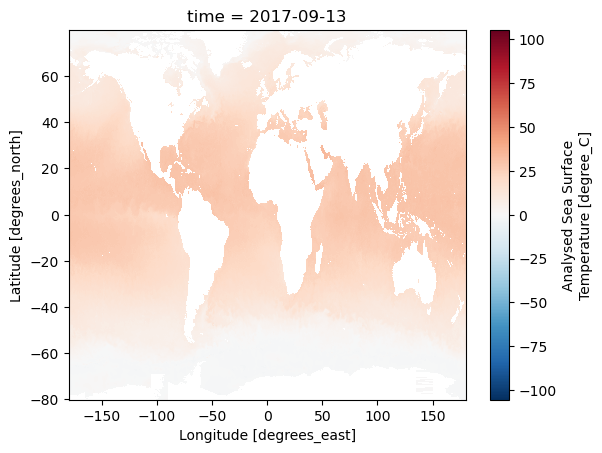

In [7]:
ds.SST.plot()